# <center> __Measuring the Progression of Alzheimer's Disease Quantitatively using Image Processing Techniques__ </center>

#### Table of contents
__Introduction__<br>
__Methodology__<br>
__&nbsp;&nbsp;1. Visualising the data in 2D__<br>
__&nbsp;&nbsp;1.1 Required packages__<br>
__&nbsp;&nbsp;1.2 Plotting the scan in 2-dimensions__<br>
__&nbsp;&nbsp;1.3 Threshold values__<br>
__&nbsp;&nbsp;2 Calculations of area and volume__<br>
__&nbsp;&nbsp;2.1 Finding the brain volume__<br>
__&nbsp;&nbsp;&nbsp;&nbsp;2.1.1 Area of one slice of the brain__<br>
__&nbsp;&nbsp;&nbsp;&nbsp;2.1.2 Finding the whole brain volume__<br>
__&nbsp;&nbsp;2.2 Finding grey matter volume__<br>
__&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 Area of grey matter in a brain slice__<br>
__&nbsp;&nbsp;&nbsp;&nbsp;2.2.2. Volume of grey matter in the brain__<br>
__Results and Interpretation__<br>
__Limitations to the methodology__<br>
__Taking this idea further__<br>
__&nbsp;&nbsp;Tracking cancer tumour growth__<br>
__References__

## Introduction

This project uses the NiBabel library to process MRI scans of brains of two patients suffering from Alzheimer's Disease (AD), Subject_01 and Subject_02. We will analyse the distribution of grey matter in two scans from each patient and endeavour to determine the extent of AD progression in each patient in a quantitative manner.

 - Alzheimer’s Disease is a neurodegenerative disease which results in the death of the cells which make up grey matter in the brain.
 - Grey matter constitutes the “processing” portion of the brain, as opposed to white matter, which is specialised to connect different regions of the brain together. As a result, the loss of grey matter results in dementia, a condition which affects the memory, cognition and movement of the patient.
 - Magnetic Resonance Imaging (MRI) technology can be used to image the brain, track development of disease, help decide clinical treatment options, evaluate effectiveness of treatments. This is achieved using magnets to generate a strong magnetic field around the organ of interest. Protons in body tissues are spin-aligned by this magnetic field and energised by a radio frequency (RF) pulse. After the RF pulse, the protons release energy through tissues to be detected by the machine.

<figure>
    <center><img src="https://www.radiologyinfo.org/-/media/radinfo/gallery-items/images/a-to-d/brain-regions-alzheimer-mri.ashx" width="528" height="252"></center>
    <center><figcaption><b>Figure 1:</b> Alzheimer's Disease progression in an individual. Note the loss of grey matter in brain B compared to brain A. (Source: radiologyinfo.org) </figcaption></center>
</figure>

<figure>
    <center><img src="https://my-ms.org/images/mri_planes_gnu.jpg" width="450" height="450"></center>
    <center><figcaption><b>Figure 2:</b> Diagram showing the planes along which MRI data can be imaged. (Source: my-ms.org) </figcaption></center>
</figure>

## Methodology

### __1. Visualising the data in 2D__

#### __1.1 Required packages__

We must first import the necessary libraries to open and visualise the ```.nii``` files of the subjects. We imported ```os``` for interacting with the operating system, ```numpy``` as ```np``` for working with arrays, ```nibabel``` as ```nib``` to read neuroimaging NIfTI files, ```matplotlib.pyplot``` as ```plt``` for plotting scans and finally ```matplotlib.image``` as ```mpimg``` and ```scipy.ndimage``` as ```sn``` for image processing.

We also import the module containing the bulk of the code and definitions needed for this project to run as ```module1```.
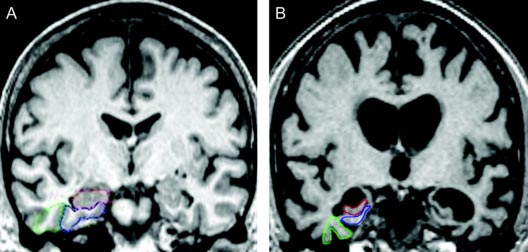
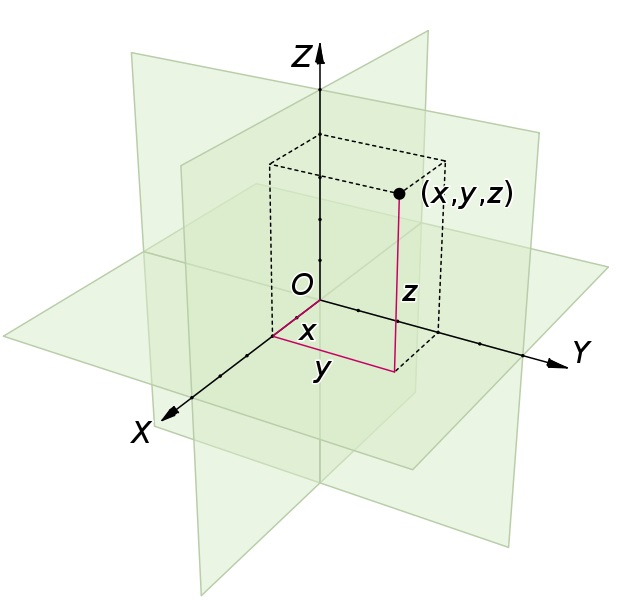

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as sn

import module1

#### __1.2 Plotting the scan in 2-dimensions__

We chose to take 2-dimensional "slices" of the brain on the coronal ```(x-z)``` plane. As such, we must choose a value on the y-axis to give a scan which displays the necessary anatomy.
We have used the definition ```scan_slices1``` which leaves us with the aforementioned slices at ```y=77``` on all four subject files.

The slice ```y=77``` was used as it is found roughly in the middle of the skull on the coronal plane and so leaves us with a scan that is easier to use.


(<AxesSubplot:title={'center':'subject2_02'}>,
 Text(0.5, 1.0, 'subject2_02'))

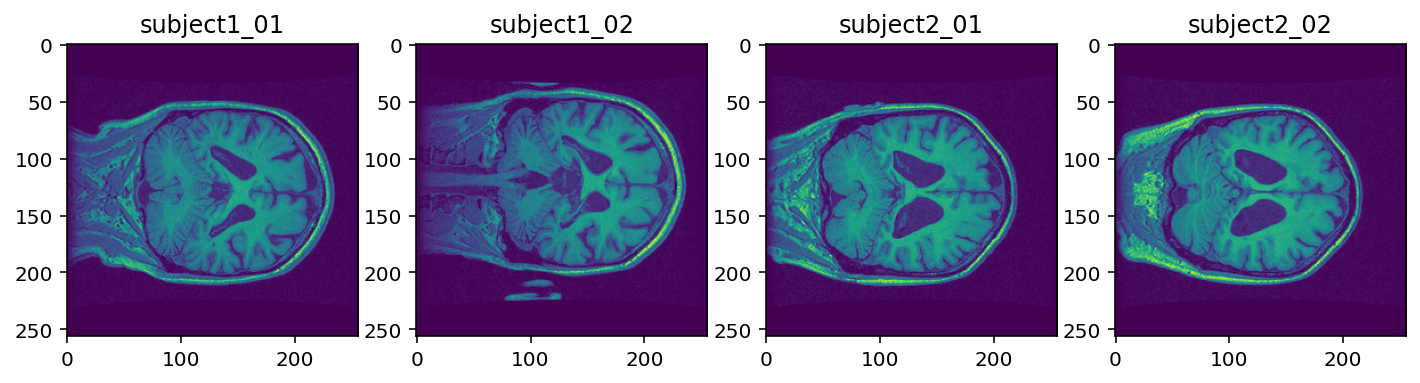

In [2]:
y = 77
plt.subplot(141), plt.imshow(module1.scan_slices1("subject1_01.nii", y)), plt.title("subject1_01")
plt.subplot(142), plt.imshow(module1.scan_slices1("subject1_02.nii", y)), plt.title("subject1_02")
plt.subplot(143), plt.imshow(module1.scan_slices1("subject2_01.nii", y)), plt.title("subject2_01")
plt.subplot(144), plt.imshow(module1.scan_slices1("subject2_02.nii", y)), plt.title("subject2_02")

Note how the patients in the scans are rotated 90 degrees clockwise from a "normal" upright orientation. What is also apparent from these initial images is the range of different tissues that must be "filtered out" before we can form an analysis of the grey matter in the brain. This can be achieved by thresholding the pixel intensities.

#### __1.3 Threshold values__

Each slice on the y-axis will have different proportions of brain and skull, which changes the ideal threshold value. To establish the ideal threshold values for the individual scans, the local maximum of intensity peaks

This was achieved by generating a table containing the frequencies of all intensity values. From experience we learned the frequencies of intensities 0-25 are extremely high, however these correspond to irrelevant pixels. Therefore these the frequencies of these values were set to zero. This can be visualised by the following histogram:

(63.0, 45.0)

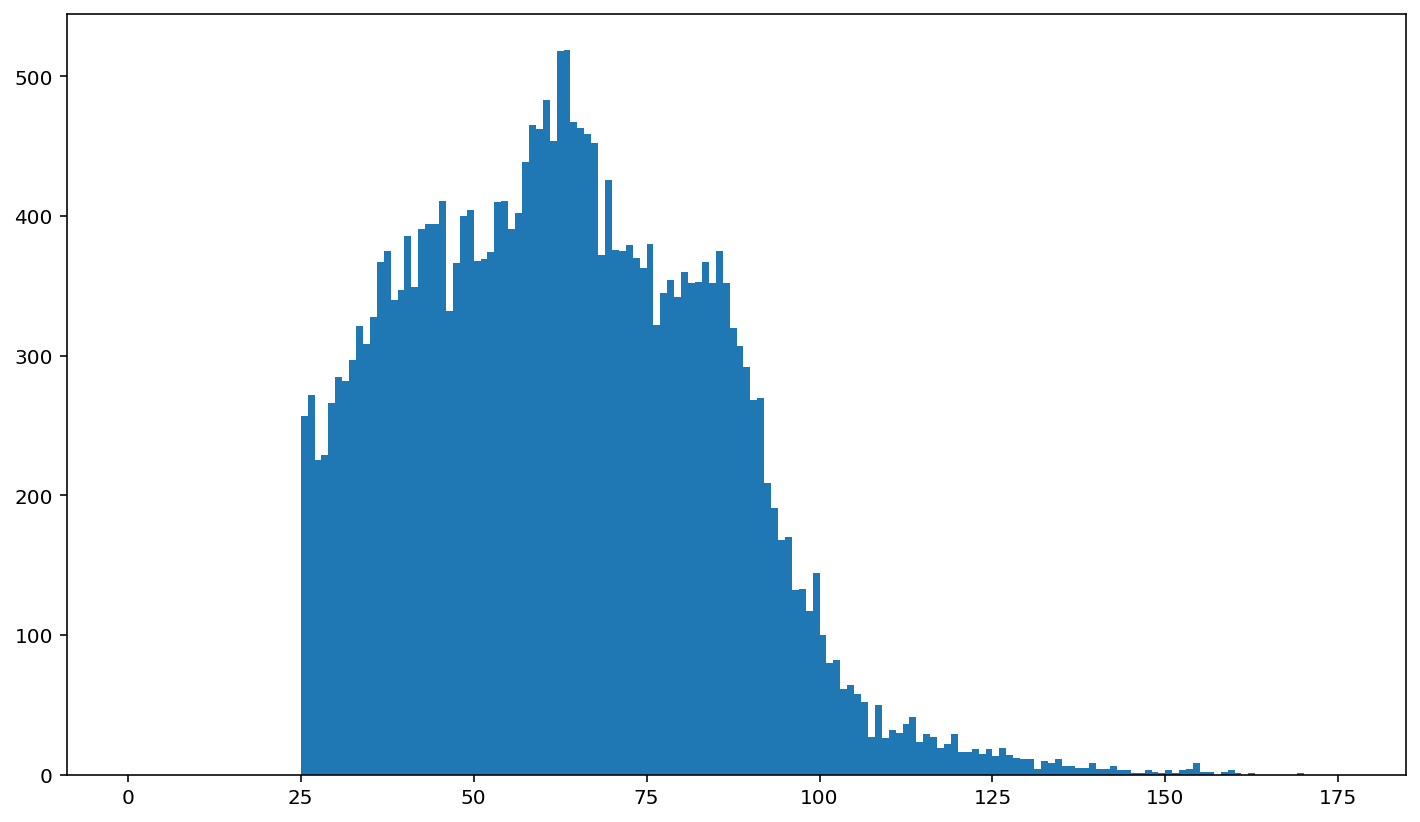

In [3]:
slice=module1.scan_slices1("subject1_01.nii",77)
module1.histogram(slice)
module1.get_threshold_values(slice)

The output of ```get_threshold_values``` indicates that at ```y=77```, the ideal value for thresholding the white matter is ```63```, and the ideal value for thresholding the grey matter is ```45```. 

The absolute maximum of the frequencies indicates the high frequency of pixels corresponding to white matter. The local maximum of the other peak at a lower intensity indicates pixels corresponding to grey matter.
In the following steps, these peak values are used to threshold the scans in two steps: firstly separate the skull from the brain, then to isolate the white matter. The grey matter will be the result of the "subtraction" of white matter from the first threshold:


(<AxesSubplot:title={'center':'Grey matter'}>,
 Text(0.5, 1.0, 'Grey matter'))

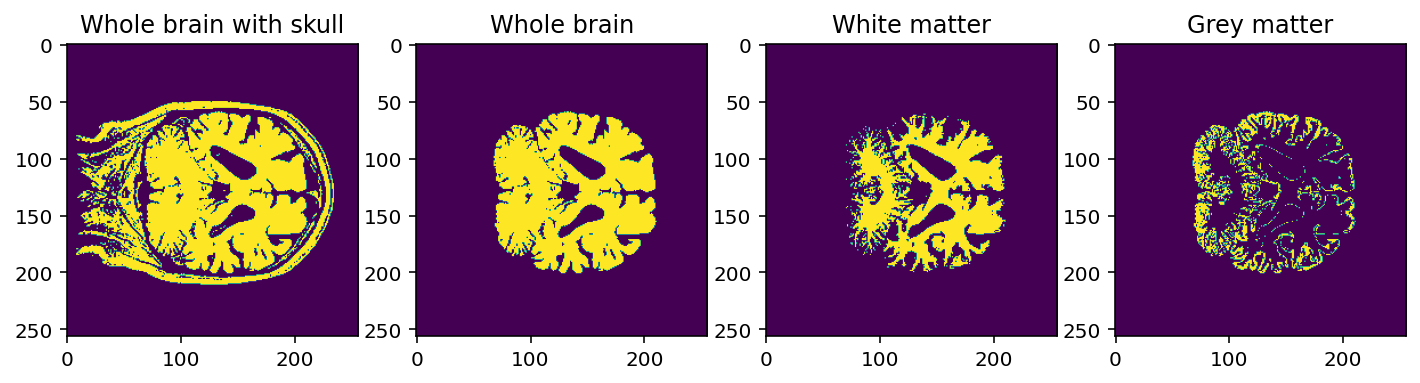

In [4]:
plt.subplot(141), plt.imshow(module1.brain_threshold("subject1_01.nii", y)),plt.title("Whole brain with skull")
plt.subplot(142),plt.imshow(module1.get_whole_brain(slice)),plt.title("Whole brain")
plt.subplot(143),plt.imshow(module1.get_white_matter(slice)),plt.title("White matter")
plt.subplot(144),plt.imshow(module1.get_grey_matter(slice)),plt.title("Grey matter")

The skull was eliminated by labelling all the continuous areas of pixels ("blobs") and setting the intensity values in every blob other than the largest, which includes to whole brain but hopefully does not include the skull and other undesired segments. This idea is further explored quantitatively in Section 2. 

### __2. Calculations of area and volume__

#### __2.1 Finding the brain volume__
As grey matter is a tissue completely localised to the brain, the changes of grey matter can be observed by comparing ratios of the volume of brain and grey matter in the previous and present stages of the two patients. To achieve this, we calculated the area of brain tissues in single slice and summed these areas over a 3rd dimension to get the brain volume.

Whole brain volumes are an integral part of our final calculation step using ratios, enabling us to make valid comparisons of grey matter change between the two scans of each subject.

#### __2.1.1 Area of one slice of brain__

Here the definition ```brain_area``` is used to isolate the largest continuous area of pixels in a given slice of brain, or "blob". Note the size of this blob, which is effectively the area of the whole brain (no skull or other tissues) on any given scan:

```python
def brain_area(filename, slice_level):
    Slice_ = scan_slices1(filename, slice_level)
    thres = get_threshold_values(Slice_)[1]
    x_thres = Slice_ > thres                                        #thresholding

    (x_labels, n) = sn.label(x_thres)
    sizes = sn.sum(x_thres, x_labels, range(1, n + 1))              #finding size of largest blob size
    max1 = max(sizes)
    return (max1)
```

#### __2.1.2 Finding the whole brain volume__

Volume of the whole brain utilised the ```brain_volume``` definition; the ```brain_area``` definition is iterated over a range on the y-axis. These values are collected in a list before being added together within the bounds of the brain. We took the bounds to be the whole scan range (from 0 to ```img.shape[2]```) since we have removed non-brain tissues already. The summation of area values along this third dimension gives a value for total volume of the brain voxels:

```python
def brain_volume(filename):
    miny = 0
    img = nib.load(filename)
    area_list = []                                                  #empty list to put areas into
    for y in range(miny, img.shape[2]):                             #iterating the brain_area along the y-axis = volume!
        area_list.append(brain_area(filename, miny))                #add area to list
        miny = miny + 1                                             #go to next slice above
    return (sum(area_list))
```
Generating four brain volumes in situ took an undesirable amount of time, so after consultation with the supervisor, it was agreed to pre-calculate the volumes and store them as variables. The code required to calculate the brain volumes is shown below:

```python
bvol1_1=module1.brain_volume("subject1_01.nii")
bvol1_2=module1.brain_volume("subject1_02.nii")
bvol2_1=module1.brain_volume("subject2_01.nii")
bvol2_2=module1.brain_volume("subject2_02.nii")

print(bvol1_1, bvol1_2, bvol2_1, bvol2_2)
```
This gives the output:
```
1152031.0 1485867.0 1030112.0 1079544.0
```
Since the brain volume has changed  from the before and after scans of each subject, we calculate grey matter volume per subject file as above

This calculation allows us to compare percentage change of grey matter via comparison.

In [5]:
bvol1_1=1152031.0
bvol1_2=1485867.0
bvol2_1=1030112.0
bvol2_2=1079544.0

#### __2.2 Finding grey matter volume__

As the calculation shows, brain volume has changed across the two scans in a subject, so grey matter volume must also be calculated per subject file. We can therefore ascertain percentage change of grey matter change via comparison of greymatter:wholebrain ratios x_01 and x_02, where x is the Subject at hand.

#### __2.2.1 Area of grey matter in a brain slice__

The area of grey matter in a brain slice was found in a different way to brain tissues in Section 2.1.1, since it is not a continuous structure. We used our ```get_grey_matter``` definition to do this, subtracting the white matter numpy array from the whole brain array to give a grey matter array where the zeros represent background pixels and the ones represent the pixels of grey matter. We can then calculate the grey matter area by counting the number of ones in this array using the ```area``` definition. Reference to the scan plots in Section 1.3 gives a visual representation of what we have done at this stage.

#### __2.2.2 Volume of grey matter in the brain___

Similar to Section 2.1.2, the grey matter volume is found by the summation of all of the grey matter areas within a range on the y-axis. We used our ```grey_matter_volume``` definition which combines the elements of Section 2.2.1 for this purpose:

```python
def grey_matter_volume(filename):
    img = nib.load(filename)
    example_file = img.get_fdata()
    total_size = 0
    for z in range(img.shape[2]):
        Slice = example_file[:, :, z]
        Slice_ = Slice.astype(int)
        size = area(get_grey_matter(Slice_))
        total_size = total_size + size                                  #add area to list
    return total_size                                                   #give total grey matter volume
```
We must store the grey matter volumes after we generate them as variables for use later in the calculation of ratios stage:

```python
vol1=module1.grey_matter_volume("subject1_01.nii")
vol2=module1.grey_matter_volume("subject1_02.nii")
vol3=module1.grey_matter_volume("subject2_01.nii")
vol4=module1.grey_matter_volume("subject2_02.nii")

print(vol1, vol2, vol3, vol4)
```
Running this code will give the output:

```
324598  101786  305461  321728
```

Once again, the time for the code to generate these output values took too long, so instead the pre-calculated values have been stored in variables below and the code to generate them is preserved above:

In [8]:
vol1 = 324598
vol2 = 101786
vol3 = 305461
vol4 = 321728

## __Results and Interpretation__

The scans at different time points do not share parameters such as brain size or position in the scan. Therefore the change in grey matter volume cannot be calculated as the difference of the volumes yielded from the two scenarios.
Instead, we built on the idea that the ratio of grey matter and the whole brain is constant for healthy patients, and we calculated the change in the ratios of grey matter and whole brain.

In [9]:
print(module1.grey_matter_change(vol1,vol2,int(bvol1_1),int(bvol1_2)))
print(module1.grey_matter_change(vol3,vol4,int(bvol2_1),int(bvol2_2)))

decrease in volume of grey matter is 21.33%
decrease in volume of grey matter is -0.15%


 - We found that for Subject_01 there is 21% reduction in the volume of grey matter, which gives us a reason to suspect that this patient has Alzheimer's disease.
 - In case of Subject_02, we detected a slight increase in grey matter volume of 0.15%. We suspect that this is due to errors in our model. We will discuss these limitations in the following section.

We have shown that we can quantitatively monitor the progression of Alzheimer's through measuring the volume differences of brain matter over a period of time. This same method and code could therefore be applied for use in different tasks. For example, we could monitor the growth and disappearances of tumours in cancers and consequently make informed decisions as to whether said tumours are malignant or benign, as described in the final section.

## __Limitations of the methodology__

Having completed the task, we have identified the following limitations present in our methodology and recommend the following improvements for future efforts:

 - In many slices the approach that we used to eliminate the skull also eliminates areas of the brain, since the whole brain is not always a continuous area of pixel. Sometimes parts of the brains are in different blobs and our model does not take into account any other blobs than the largest one.

 - In some of the slices, there was grey matter attached to the brain which inflated our calculated value of grey matter. This issue could be eliminated by separating the brain and the skull. This could be done manually for individual slices, by eliminating a few critical pixels. Alternatively setting a higher threshold value could also solve this problem, however it would also remove some of the brain which would decrease the accuracy of our results.

 - Our method is relatively inefficient at many steps. It could be more efficient focusing on well determined region of the brain looking for grey matter loss, thereby expanding our sample size and increasing precision, than by examining whole images.

 - Some of our code took much longer than 2 minutes to calculate. To get around this problem we have already calculated the necessary values for ratio calculations and instead provided the code needed to generate them separately.

## __Taking this idea further__

### __Tracking cancer tumour growth__

Our project aims to process images by distinguishing different parts of images by their intensity. Due to the structural differences and variations in proton density in different types of tissues, our model of detecting grey matter changes can be extended to detecting the growth of a brain tumour. Using our method, one can observe the volume of tumour and calculate it's ratio within a given area with the following steps:<br>
 <br>
1.Load all the required packages and files<br>
2.Plot the image in 2D to have a visual cue<br>
3.Identify the thresholds needed from histogram by applying Section 1.3 to threshold out irrelevant tissues<br>
4.Calculate the volume of tumour and brain by using thresholds found in Section 1.3 and our code in Section 2<br>
5.Generate the percentage occupied by comparing tumour volume and brain volume<br>

The pathogenicity of the tumour is ascertained by the rate of change of the respective ratios: a benign tumour would exhibit no change in volume whereas a malignant tumour would see a persistent volume change over time.

Moreover, one can also predict the future growth of tumour by gathering medical images from different patients with similar conditions to expand the sample in combination with our model and statistical analysis to create a linear regression model. This could potentially offer clinical professionals a tool to evaluate prognosis and development of the disease and select a suitable treatment plan.


#### References:
Alzheimer's Disease.[online] NHS 2021 https://www.nhs.uk/conditions/alzheimers-disease/<br>
Alzheimer's Disease.[online] RadiologyInfo 2020 https://www.radiologyinfo.org/en/info/alzheimers<br>
MRI Plane Mathematics.[online] My-MS.org 2022 https://my-ms.org/mri_planes.htm<br>